# import modules

In [292]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels.panel import PanelOLS
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.power import TTestIndPower
from scipy import optimize

# global variables

In [2]:
# 路径
main_path = r'D:\中级金融计量分析' 
os.chdir(main_path)

# 画图
params={
        'font.family':'serif',
        'font.serif':'Times New Roman',
        'font.style':'normal', # or italic斜体
        'font.weight':'normal', #or 'blod'
        'font.size': 24,#or large,small
        }
plt.rcParams.update(params)

# empirical study

## Figure 1

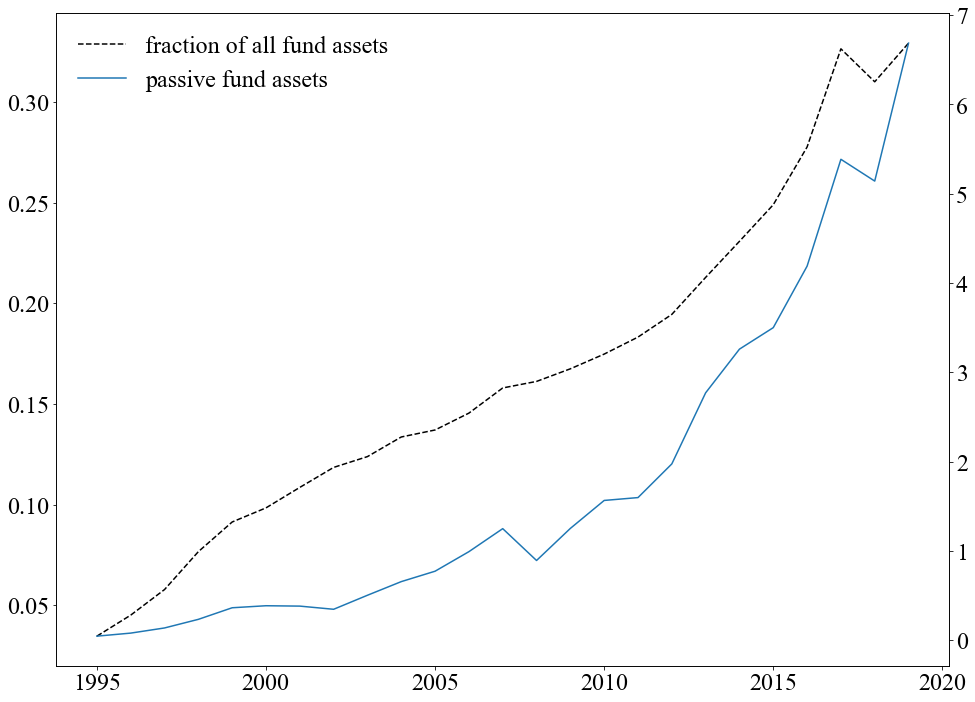

In [177]:
df = pd.read_stata('passiveaum.dta')

fig,ax = plt.subplots(figsize=(16,12))
ax2 = ax.twinx()
ax.plot(df['year'], df['frac_index'], '--', color='black', label='fraction of all fund assets')
ax2.plot(df['year'], df['aum1'], label='passive fund assets')
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1+handles2, labels1+labels2, framealpha=0)
plt.show()
fig.savefig('figure 1.png',dpi=1000, bbox_inches='tight')

## Figure 2

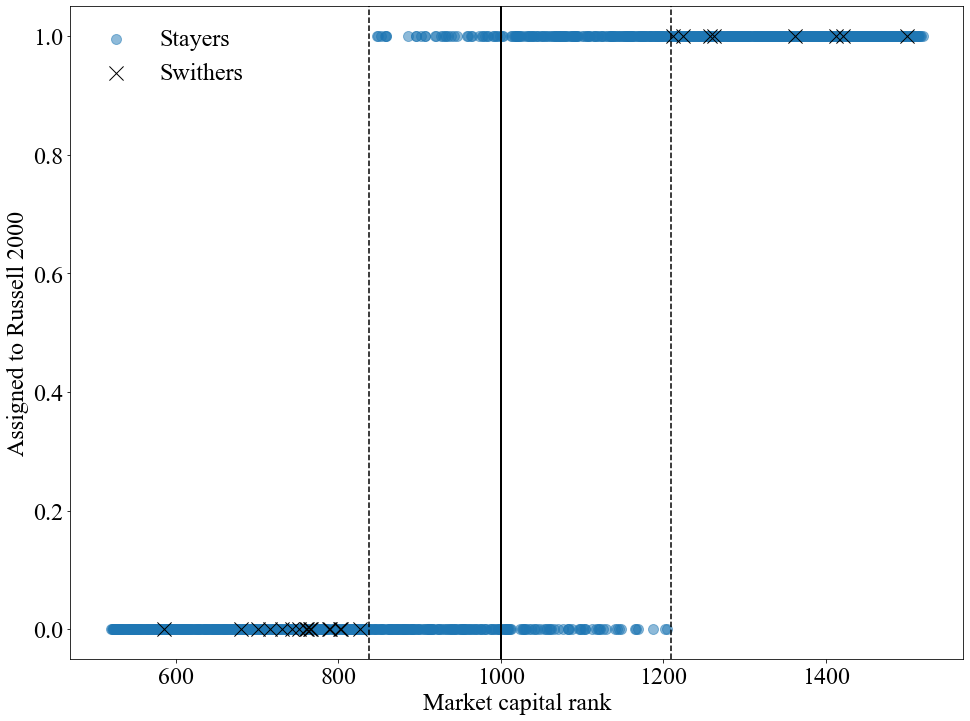

In [246]:
# 2a
df = pd.read_stata('Russell07.dta')
fig,ax = plt.subplots(figsize=(16,12))
temp1 = df[df.switcher==0]
temp2 = df[df.switcher!=0]
ax.scatter(temp1['caprank'],temp1['R2000'], alpha=0.5, s=100, label='Stayers')
ax.scatter(temp2['caprank'],temp2['R2000'], marker='x', linewidth=1, color='black', s=200, label='Swithers')
plt.axvline(838, linestyle='--', color='black')
plt.axvline(1210, linestyle='--', color='black')
plt.axvline(1000, linestyle='-', linewidth=2, color='black')
ax.set_xlabel('Market capital rank')
ax.set_ylabel('Assigned to Russell 2000')
plt.legend(framealpha=0)
plt.show()
fig.savefig('figure 2a.png',dpi=1000, bbox_inches='tight')

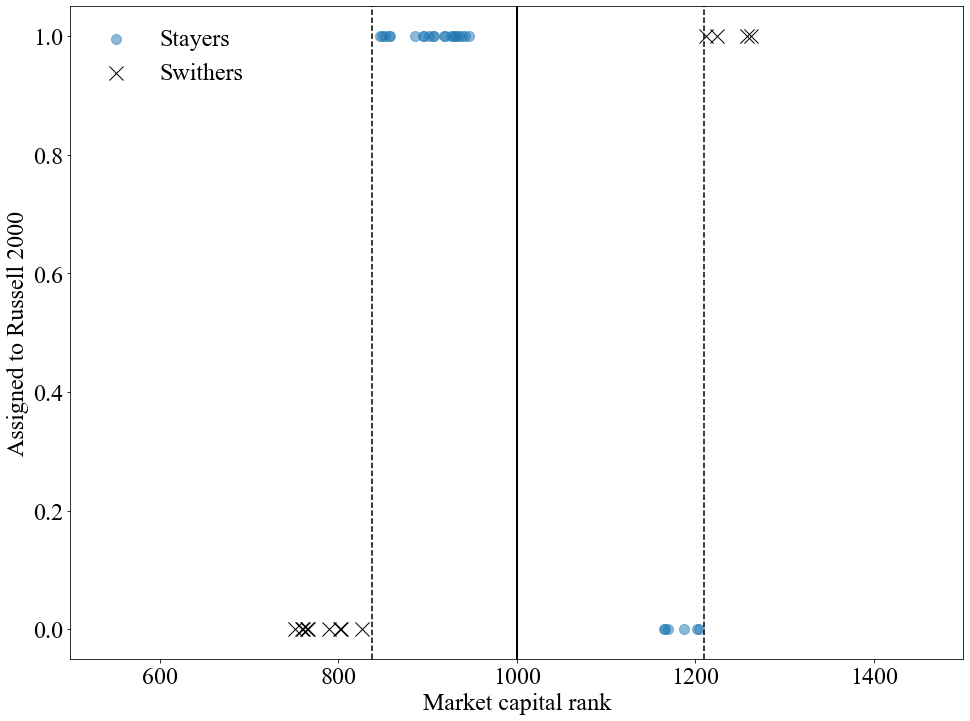

In [260]:
# 2b
df = pd.read_stata('Russell_sample_100.dta')
df = df[df.year==2007]
df = df[df.cohort==2007]
fig,ax = plt.subplots(figsize=(16,12))
temp1 = df[df.switcher==0]
temp2 = df[df.switcher!=0]
ax.scatter(temp1['caprank'],temp1['R2000'], alpha=0.5, s=100, label='Stayers')
ax.scatter(temp2['caprank'],temp2['R2000'], marker='x', linewidth=1, color='black', s=200, label='Swithers')
plt.axvline(838, linestyle='--', color='black')
plt.axvline(1210, linestyle='--', color='black')
plt.axvline(1000, linestyle='-', linewidth=2, color='black')
ax.set_xlabel('Market capital rank')
ax.set_ylabel('Assigned to Russell 2000')
ax.set_xlim(500,1500)
plt.legend(framealpha=0, loc='upper left')
plt.show()
fig.savefig('figure 2b.png',dpi=1000, bbox_inches='tight')

## Figure 3

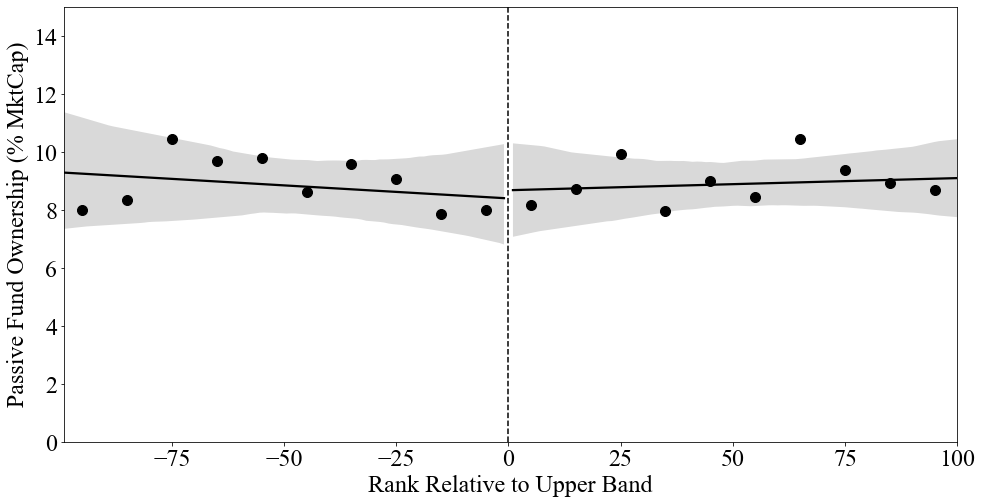

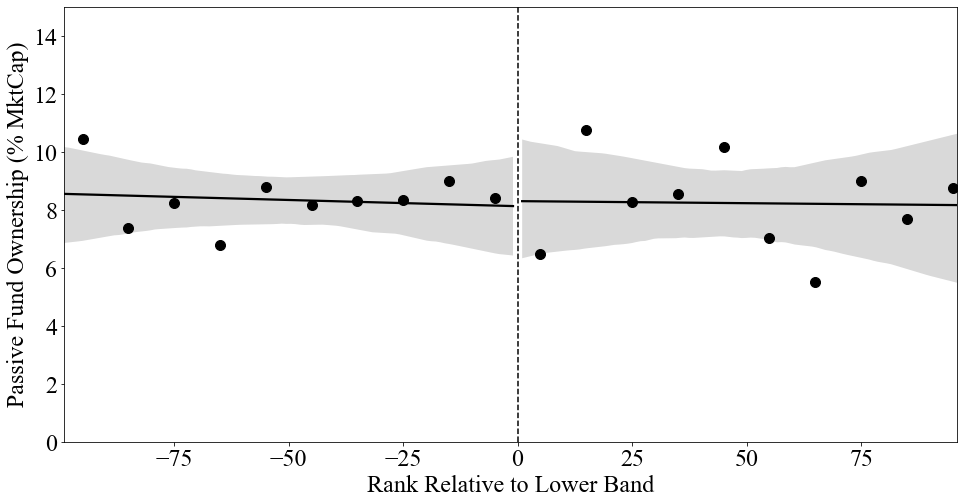

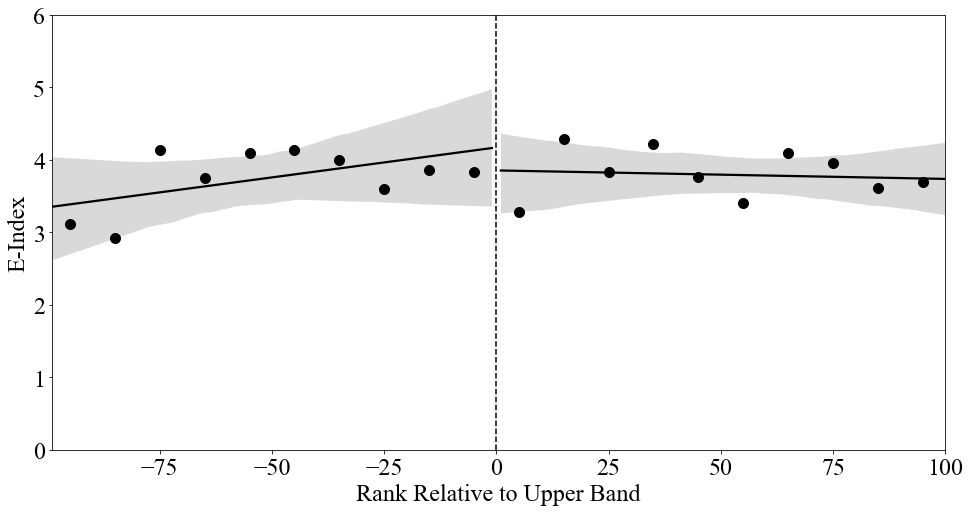

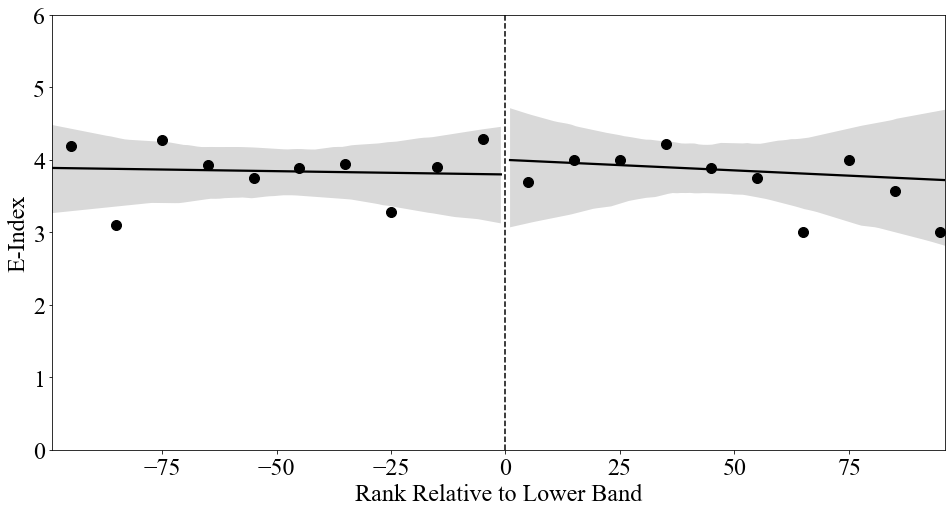

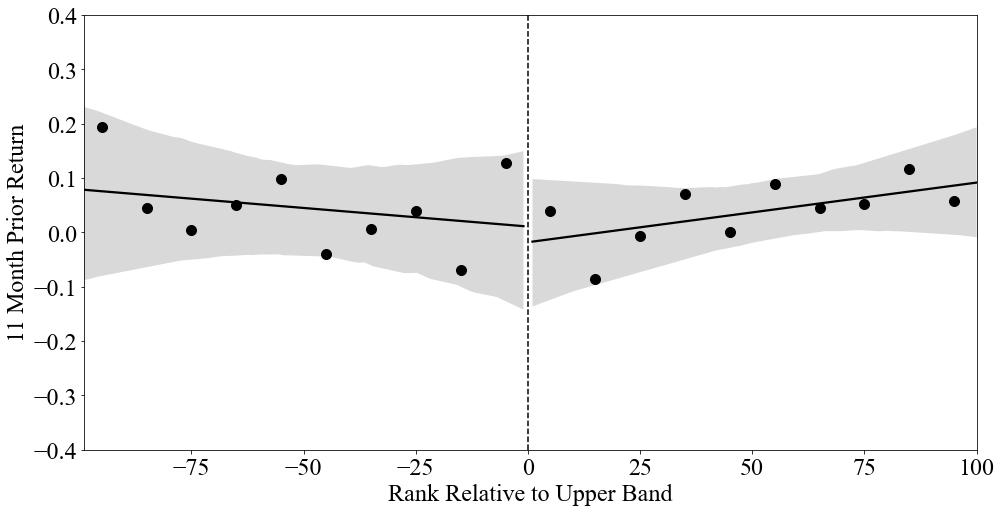

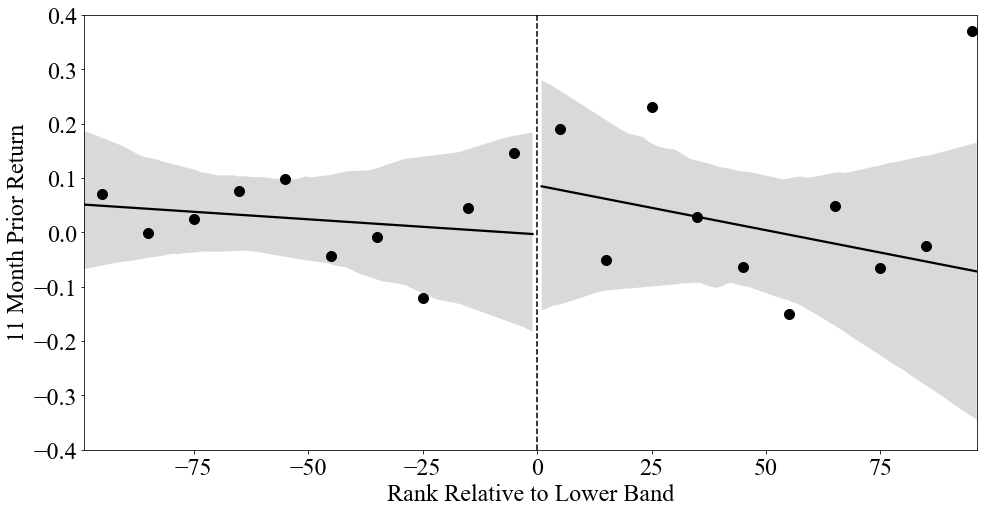

In [363]:
df = pd.read_stata('Russell_sample_100.dta')
df = df[df.year==(df.cohort - 1)] # 调整前后只间隔1年

# 3a 市值
temp = df[df.upper==1].copy() # 向上调整的股票
temp['coarse_caprank'] = np.floor(temp.caprank_rel_to_upper / 10) * 10 + 5 # 用来算分组平均的
temp1 = temp[(temp.caprank_rel_to_upper<0) & (temp.caprank_rel_to_upper>=-100)]
temp2 = temp[(temp.caprank_rel_to_upper>0) & (temp.caprank_rel_to_upper<=100)]
fig,ax = plt.subplots(figsize=(16,8))
sns.regplot(x='caprank_rel_to_upper', y='MFPassive', data=temp1, ci=99, marker='', color='black')
sns.regplot(x='caprank_rel_to_upper', y='MFPassive', data=temp2, ci=99, marker='', color='black')
temp = temp[(temp.coarse_caprank <= 100) & (temp.coarse_caprank >= -100)] # 剔除掉不在坐标轴内的
plt.axvline(0, linestyle='--', color='black')
ax.scatter(temp.groupby('coarse_caprank').mean().index, temp.groupby('coarse_caprank').mean()['MFPassive'], color='black', s=100)
ax.set_ylim(0,15)
ax.set_xlabel('Rank Relative to Upper Band')
ax.set_ylabel('Passive Fund Ownership (% MktCap)')
plt.show()
fig.savefig('figure 3a.png',dpi=1000, bbox_inches='tight')

# 3b 市值
temp = df[df.upper==0].copy() # 向下调整的股票
temp['coarse_caprank'] = np.floor(temp.caprank_rel_to_lower / 10) * 10 + 5 # 用来算分组平均的
temp1 = temp[(temp.caprank_rel_to_lower<0) & (temp.caprank_rel_to_lower>=-100)]
temp2 = temp[(temp.caprank_rel_to_lower>0) & (temp.caprank_rel_to_lower<=100)]
fig,ax = plt.subplots(figsize=(16,8))
sns.regplot(x='caprank_rel_to_lower', y='MFPassive', data=temp1, ci=99, marker='', color='black')
sns.regplot(x='caprank_rel_to_lower', y='MFPassive', data=temp2, ci=99, marker='', color='black')
temp = temp[(temp.coarse_caprank <= 100) & (temp.coarse_caprank >= -100)] # 剔除掉不在坐标轴内的
plt.axvline(0, linestyle='--', color='black')
ax.scatter(temp.groupby('coarse_caprank').mean().index, temp.groupby('coarse_caprank').mean()['MFPassive'], color='black', s=100)
ax.set_ylim(0,15)
ax.set_xlabel('Rank Relative to Lower Band')
ax.set_ylabel('Passive Fund Ownership (% MktCap)')
plt.show()
fig.savefig('figure 3b.png',dpi=1000, bbox_inches='tight')

# 3c E index
temp = df[df.upper==1].copy() # 向上调整的股票
temp['coarse_caprank'] = np.floor(temp.caprank_rel_to_upper / 10) * 10 + 5 # 用来算分组平均的
temp1 = temp[(temp.caprank_rel_to_upper<0) & (temp.caprank_rel_to_upper>=-100)]
temp2 = temp[(temp.caprank_rel_to_upper>0) & (temp.caprank_rel_to_upper<=100)]
fig,ax = plt.subplots(figsize=(16,8))
sns.regplot(x='caprank_rel_to_upper', y='bcf', data=temp1, ci=99, marker='', color='black')
sns.regplot(x='caprank_rel_to_upper', y='bcf', data=temp2, ci=99, marker='', color='black')
temp = temp[(temp.coarse_caprank <= 100) & (temp.coarse_caprank >= -100)] # 剔除掉不在坐标轴内的
plt.axvline(0, linestyle='--', color='black')
ax.scatter(temp.groupby('coarse_caprank').mean().index, temp.groupby('coarse_caprank').mean()['bcf'], color='black', s=100)
ax.set_ylim(0,6)
ax.set_xlabel('Rank Relative to Upper Band')
ax.set_ylabel('E-Index')
plt.show()
fig.savefig('figure 3c.png',dpi=1000, bbox_inches='tight')

# 3d E index
temp = df[df.upper==0].copy() # 向下调整的股票
temp['coarse_caprank'] = np.floor(temp.caprank_rel_to_lower / 10) * 10 + 5 # 用来算分组平均的
temp1 = temp[(temp.caprank_rel_to_lower<0) & (temp.caprank_rel_to_lower>=-100)]
temp2 = temp[(temp.caprank_rel_to_lower>0) & (temp.caprank_rel_to_lower<=100)]
fig,ax = plt.subplots(figsize=(16,8))
sns.regplot(x='caprank_rel_to_lower', y='bcf', data=temp1, ci=99, marker='', color='black')
sns.regplot(x='caprank_rel_to_lower', y='bcf', data=temp2, ci=99, marker='', color='black')
temp = temp[(temp.coarse_caprank <= 100) & (temp.coarse_caprank >= -100)] # 剔除掉不在坐标轴内的
plt.axvline(0, linestyle='--', color='black')
ax.scatter(temp.groupby('coarse_caprank').mean().index, temp.groupby('coarse_caprank').mean()['bcf'], color='black', s=100)
ax.set_ylim(0,6)
ax.set_xlabel('Rank Relative to Lower Band')
ax.set_ylabel('E-Index')
plt.show()
fig.savefig('figure 3d.png',dpi=1000, bbox_inches='tight')

# 3e 11 Month Prior Return
temp = df[df.upper==1].copy() # 向上调整的股票
temp['coarse_caprank'] = np.floor(temp.caprank_rel_to_upper / 10) * 10 + 5 # 用来算分组平均的
temp1 = temp[(temp.caprank_rel_to_upper<0) & (temp.caprank_rel_to_upper>=-100)]
temp2 = temp[(temp.caprank_rel_to_upper>0) & (temp.caprank_rel_to_upper<=100)]
fig,ax = plt.subplots(figsize=(16,8))
sns.regplot(x='caprank_rel_to_upper', y='rtn_julymay', data=temp1, ci=99, marker='', color='black')
sns.regplot(x='caprank_rel_to_upper', y='rtn_julymay', data=temp2, ci=99, marker='', color='black')
temp = temp[(temp.coarse_caprank <= 100) & (temp.coarse_caprank >= -100)] # 剔除掉不在坐标轴内的
plt.axvline(0, linestyle='--', color='black')
ax.scatter(temp.groupby('coarse_caprank').mean().index, temp.groupby('coarse_caprank').mean()['rtn_julymay'], color='black', s=100)
ax.set_ylim(-0.4,0.4)
ax.set_xlabel('Rank Relative to Upper Band')
ax.set_ylabel('11 Month Prior Return')
plt.show()
fig.savefig('figure 3e.png',dpi=1000, bbox_inches='tight')

# 3f 11 Month Prior Return
temp = df[df.upper==0].copy() # 向下调整的股票
temp['coarse_caprank'] = np.floor(temp.caprank_rel_to_lower / 10) * 10 + 5 # 用来算分组平均的
temp1 = temp[(temp.caprank_rel_to_lower<0) & (temp.caprank_rel_to_lower>=-100)]
temp2 = temp[(temp.caprank_rel_to_lower>0) & (temp.caprank_rel_to_lower<=100)]
fig,ax = plt.subplots(figsize=(16,8))
sns.regplot(x='caprank_rel_to_lower', y='rtn_julymay', data=temp1, ci=99, marker='', color='black')
sns.regplot(x='caprank_rel_to_lower', y='rtn_julymay', data=temp2, ci=99, marker='', color='black')
temp = temp[(temp.coarse_caprank <= 100) & (temp.coarse_caprank >= -100)] # 剔除掉不在坐标轴内的
plt.axvline(0, linestyle='--', color='black')
ax.scatter(temp.groupby('coarse_caprank').mean().index, temp.groupby('coarse_caprank').mean()['rtn_julymay'], color='black', s=100)
ax.set_ylim(-0.4,0.4)
ax.set_xlabel('Rank Relative to Lower Band')
ax.set_ylabel('11 Month Prior Return')
plt.show()
fig.savefig('figure 3f.png',dpi=1000, bbox_inches='tight')

## Figure 4

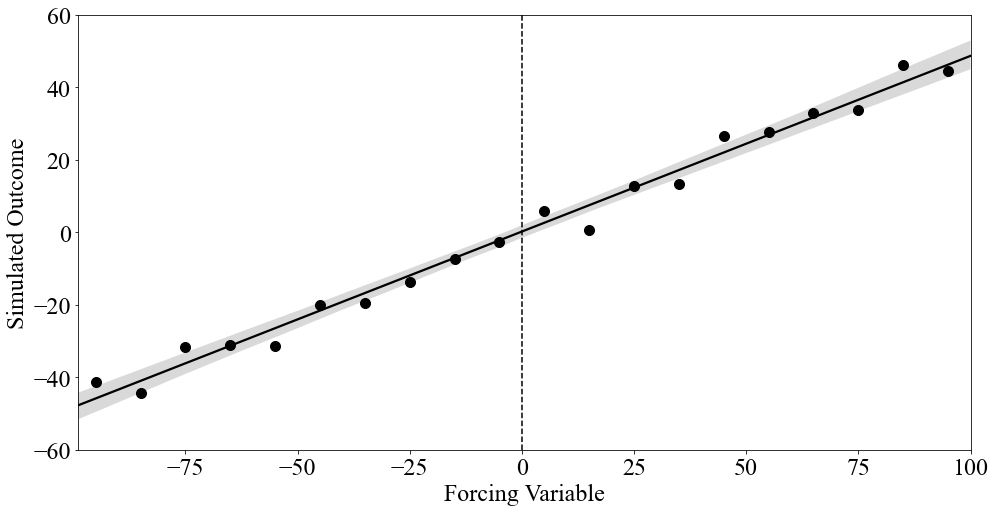

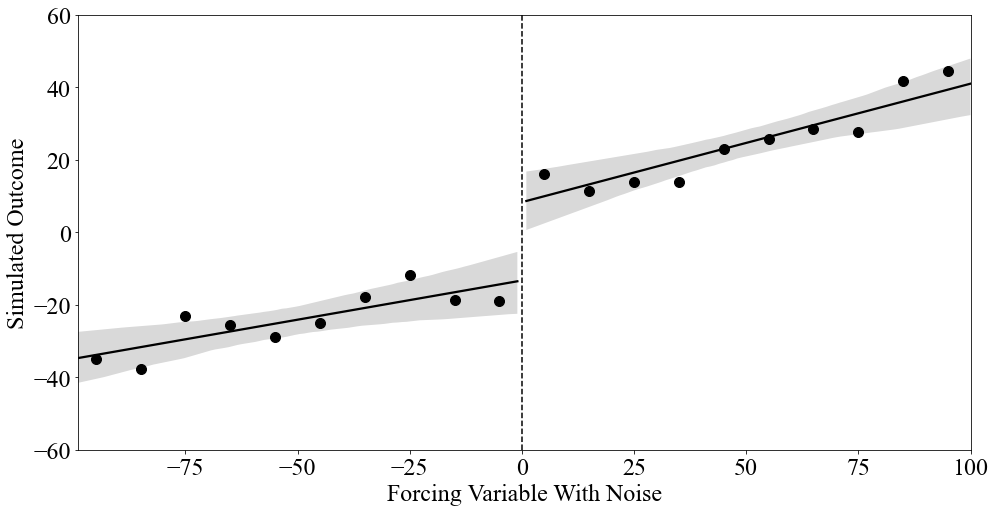

In [371]:
df = pd.read_stata('simulated_data.dta')

# 4a
temp = df.copy()
temp = temp[(temp.forcing<=100) & (temp.forcing>=-100)]
temp['coarse_forcing'] = np.floor(temp.forcing / 10) * 10 + 5 # 用来算分组平均的
fig,ax = plt.subplots(figsize=(16,8))
sns.regplot(x='forcing', y='outcome', data=temp, ci=99, marker='', color='black')
temp = temp[(temp.coarse_forcing <= 100) & (temp.coarse_forcing >= -100)] # 剔除掉不在坐标轴内的
ax.scatter(temp.groupby('coarse_forcing').mean().index, temp.groupby('coarse_forcing').mean()['outcome'], color='black', s=100)
plt.axvline(0, linestyle='--', color='black')
ax.set_xlabel('Forcing Variable')
ax.set_ylabel('Simulated Outcome')
ax.set_ylim(-60,60)
plt.show()
fig.savefig('figure 4a.png',dpi=1000, bbox_inches='tight')

# 4b
temp = df.copy()
temp1 = temp[(temp.forcing2<0) & (temp.forcing2>=-100)]
temp2 = temp[(temp.forcing2>0) & (temp.forcing2<=100)]
temp['coarse_forcing2'] = np.floor(temp.forcing2 / 10) * 10 + 5 # 用来算分组平均的
fig,ax = plt.subplots(figsize=(16,8))
sns.regplot(x='forcing2', y='outcome', data=temp1, ci=99, marker='', color='black')
sns.regplot(x='forcing2', y='outcome', data=temp2, ci=99, marker='', color='black')
temp = temp[(temp.coarse_forcing2 <= 100) & (temp.coarse_forcing2 >= -100)] # 剔除掉不在坐标轴内的
ax.scatter(temp.groupby('coarse_forcing2').mean().index, temp.groupby('coarse_forcing2').mean()['outcome'], color='black', s=100)
plt.axvline(0, linestyle='--', color='black')
ax.set_xlabel('Forcing Variable With Noise')
ax.set_ylabel('Simulated Outcome')
ax.set_ylim(-60,60)
plt.show()
fig.savefig('figure 4b.png',dpi=1000, bbox_inches='tight')

## Figure 5

In [59]:
df = pd.read_stata('Russell_sample_100.dta')
df['rel_year'] = df['year'] - df['cohort']
df = df.groupby(['upper', 'switcher', 'rel_year']).agg(['mean','sem'])['passivefund_own_R2000']
df = df.reset_index()
# upper = 1
temp = df[df['upper']==1].copy()
temp['switcher'] = temp['switcher'].replace(-1,1)
temp.drop(columns=['upper'], inplace=True)
temp = temp.set_index(['rel_year','switcher']).unstack().sort_values(by='switcher',axis=1)
temp['upper'] = 1
# upper = 0
temp1 = df[df['upper']==0].copy()
temp1['switcher'] = temp1['switcher'].replace(-1,1)
temp1.drop(columns=['upper'], inplace=True)
temp1 = temp1.set_index(['rel_year','switcher']).unstack().sort_values(by='switcher',axis=1)
temp1['upper'] = 0

temp = temp.append(temp1).sort_values(by='upper')
temp.columns = ['mean0','sem0','mean1','sem1','upper']
temp['lb0'] = temp['mean0'] - 2 * temp['sem0']
temp['ub0'] = temp['mean0'] + 2 * temp['sem0']
temp['lb1'] = temp['mean1'] - 2 * temp['sem1']
temp['ub1'] = temp['mean1'] + 2 * temp['sem1']
temp['lower'] = temp['upper']==0
temp.loc[temp.lower==True,'lower2'] = "Lower Band (R1000 {&rarr} R2000)"
temp.loc[temp.lower==False,'lower2'] = "Lower Band (R2000 {&rarr} R1000)"
temp

,mean0,sem0,mean1,sem1,upper,lb0,ub0,lb1,ub1,lower,lower2
rel_year,,,,,,,,,,,
-3,0.156030,0.035166,0.141302,0.051118,0,0.085697,0.226362,0.039066,0.243538,True,Lower Band (R1000 {&rarr} R2000)
-2,0.066345,0.024558,0.045150,0.028412,0,0.017230,0.115460,-0.011674,0.101974,True,Lower Band (R1000 {&rarr} R2000)
-1,0.000000,0.000000,0.123961,0.054510,0,0.000000,0.000000,0.014941,0.232981,True,Lower Band (R1000 {&rarr} R2000)
0,0.154263,0.043493,2.099414,0.065674,0,0.067278,0.241248,1.968066,2.230761,True,Lower Band (R1000 {&rarr} R2000)
1,1.042622,0.087734,2.142434,0.090097,0,0.867154,1.218089,1.962241,2.322627,True,Lower Band (R1000 {&rarr} R2000)
2,1.298348,0.095086,2.202878,0.117981,0,1.108175,1.488520,1.966915,2.438841,True,Lower Band (R1000 {&rarr} R2000)
-3,1.467304,0.044630,1.427165,0.060834,1,1.378045,1.556564,1.305497,1.548833,False,Lower Band (R2000 {&rarr} R1000)
-2,1.581118,0.043268,1.656058,0.054325,1,1.494582,1.667655,1.547408,1.764708,False,Lower Band (R2000 {&rarr} R1000)
-1,1.787587,0.039851,1.693187,0.048941,1,1.707884,1.867289,1.595305,1.791070,False,Lower Band (R2000 {&rarr} R1000)


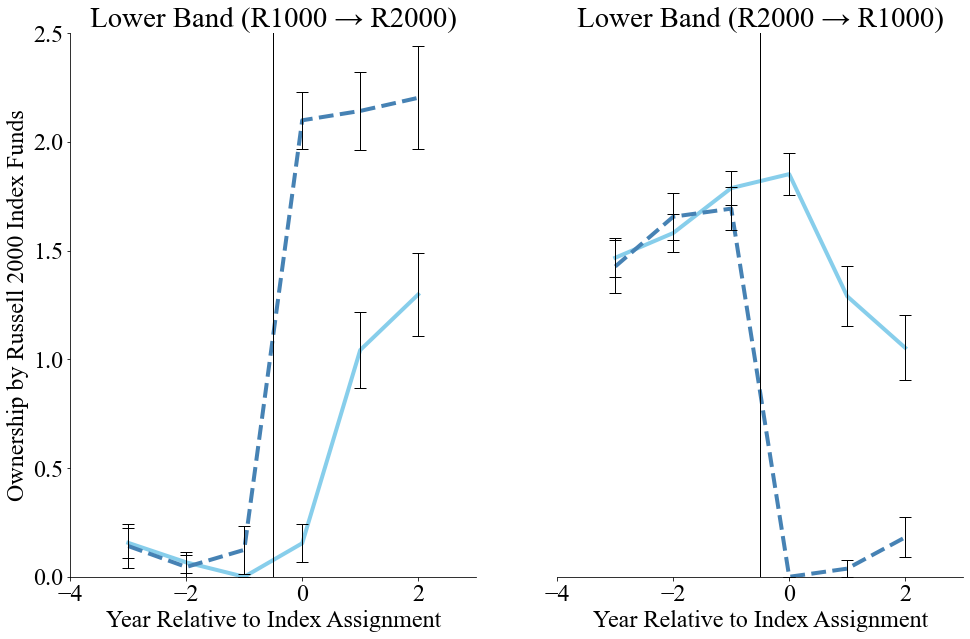

In [151]:
fig,ax = plt.subplots(1,2,figsize=(16,10))
# 左图
temp1 = temp[temp.lower].copy()
ax[0].plot(temp1.reset_index().rel_year, temp1['mean0'], linewidth=4, color='skyblue')
ax[0].plot(temp1.reset_index().rel_year, temp1['mean1'], '--', linewidth=4, color='steelblue')
ax[0].set_xlim(-4,3)
ax[0].set_ylim(0,2.5)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_title("Lower Band (R1000 → R2000)")
ax[0].set_xlabel('Year Relative to Index Assignment')
ax[0].set_ylabel('Ownership by Russell 2000 Index Funds')
ax[0].axvline(-0.5, color='black', linewidth=1)
for i in temp1.index: # 画stayer
    ax[0].axvline(i, color='black', linewidth=1, marker='_', markersize=12, ymin=temp1.loc[i,'lb0']/2.5, ymax=temp1.loc[i,'ub0']/2.5)
for i in temp1.index: # 画switcher
    ax[0].axvline(i, color='black', linewidth=1, marker='_', markersize=12, ymin=temp1.loc[i,'lb1']/2.5, ymax=temp1.loc[i,'ub1']/2.5)
# 右图
temp2 = temp[~temp.lower]
ax[1].plot(temp2.reset_index().rel_year, temp2['mean0'], linewidth=4, color='skyblue')
ax[1].plot(temp2.reset_index().rel_year, temp2['mean1'], '--', linewidth=4, color='steelblue')
ax[1].set_xlim(-4,3)
ax[1].set_ylim(0,2.5)
plt.gca().axes.get_yaxis().set_visible(False) # y轴不可见
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].axvline(-0.5, color='black', linewidth=1)
for i in temp2.index: # 画stayer
    ax[1].axvline(i, color='black', linewidth=1, marker='_', markersize=12, ymin=temp2.loc[i,'lb0']/2.5, ymax=temp2.loc[i,'ub0']/2.5)
for i in temp2.index: # 画switcher
    ax[1].axvline(i, color='black', linewidth=1, marker='_', markersize=12, ymin=temp2.loc[i,'lb1']/2.5, ymax=temp2.loc[i,'ub1']/2.5)
    
ax[1].set_title("Lower Band (R2000 → R1000)")
ax[1].set_xlabel('Year Relative to Index Assignment')
plt.show()
fig.savefig('figure 5.png',dpi=1000, bbox_inches='tight')

## Figure 6

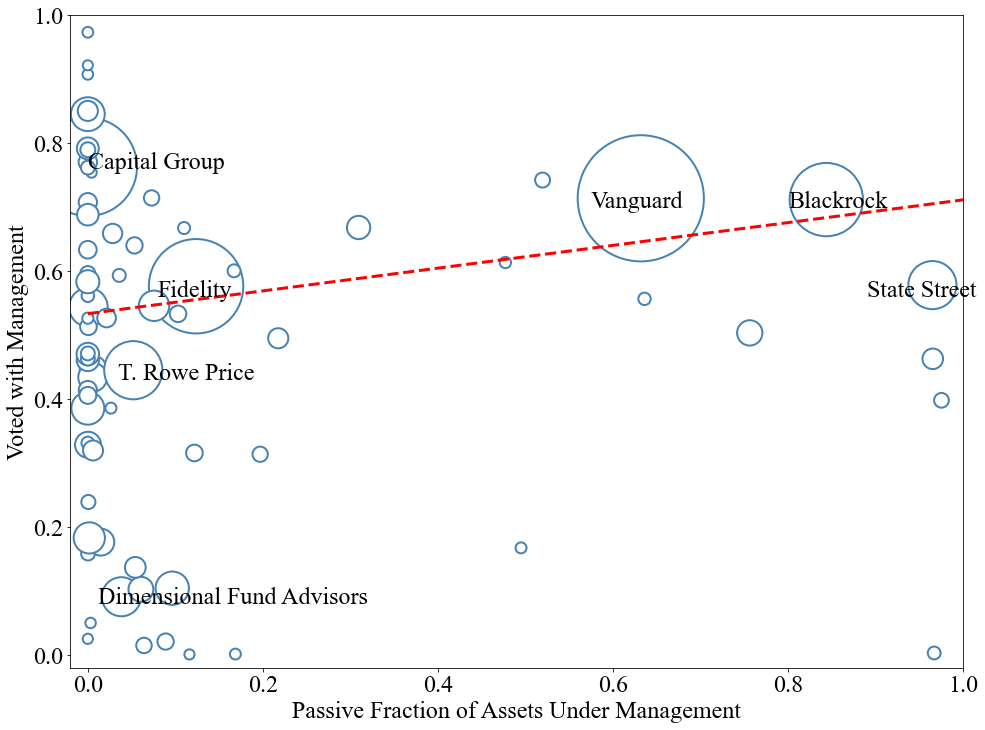

In [149]:
df = pd.read_stata('fundfamilies.dta')
fig,ax = plt.subplots(figsize=(16,12))
ax.scatter(df['frac_passive'], df['voted_with_mgmt'], s=df['tna_total']/100, marker='o', color='white', edgecolor='steelblue',linewidth=2)
ax.text(0.575,0.7,"Vanguard", ha='left')
ax.text(0.8,0.7,"Blackrock", ha='left')
ax.text(0.89,0.56, "State Street", ha='left')
ax.text(0.08,0.56, "Fidelity")
ax.text(0.012,0.08, "Dimensional Fund Advisors")
ax.text(0,0.76, "Capital Group")
ax.text(0.035,0.43, "T. Rowe Price")
mod = smf.wls(formula='voted_with_mgmt ~ frac_passive', weights=df.tna_total, data=df) # WLS回归
temp = np.linspace(0,100,100)
temp = pd.DataFrame(temp, columns=['x'])
temp['y'] = mod.fit().params[0] + temp['x'] * mod.fit().params[1]
ax.plot(temp['x'], temp['y'], '--', color='red', linewidth=3)
ax.set_xlim(-0.02,1)
ax.set_ylim(-0.02,1)
ax.set_xlabel('Passive Fraction of Assets Under Management')
ax.set_ylabel('Voted with Management')
plt.show()
fig.savefig('figure 6.png',dpi=1000, bbox_inches='tight')

## Table 1

In [131]:
# AUM和expense ratio的分组描述性统计
df = pd.read_stata('fundyear_panel.dta')
temp = df[['tna_latest','exp_ratiow','indexfund']].groupby('indexfund').describe(percentiles=[.1,.5,.9]) # 按照indexfund分组的
#temp2 = df[['tna_latest','exp_ratiow']].describe(percentiles=[.1,.5,.9]) # 不分组的
#temp2.columns = [0,1] # 跟stata中的图表匹配起来，把标题改成0,1
table1 = (temp['tna_latest'].round(0)).append(temp['exp_ratiow'].round(2)) # latest保留0位小数，exp_ratiow保留2位小数
table1.index.name = 'indexfund'

# 持有个股情况
df = pd.read_stata('fundholdings_byyear.dta')
temp1 = df[['nholdings','indexfund']].groupby('indexfund').describe(percentiles=[.1,.5,.9])
table1 = table1.append(temp1['nholdings'].round(0)).sort_values(by='indexfund',ascending=False)
table1['variable'] = ['AUM ($M)','Expense ratio (%)','# stocks hold','AUM ($M)','Expense ratio (%)','# stocks hold']
table1 = table1[['variable','mean','std','10%','50%','90%','count']]

# 计算indexfund和activefund的个数
df = pd.read_stata('fundyear_panel.dta')
print('index fund的数量为{}，active fund的数量为{}。'.format(len(df[df.indexfund==1]['fundid_anon'].drop_duplicates()), len(df[df.activefund==1]['fundid_anon'].drop_duplicates())))
table1.to_excel('table1.xlsx')

index fund的数量为613，active fund的数量为2646


## Table 2

In [13]:
df = pd.read_stata('Russell_sample_100.dta')
temp = df.describe(percentiles=[.1,.5,.9])
temp = temp[['ME','passivefund_own_R2000','passivefund_own_R1000','MFPassive','MFActive','delta','totalcomp','equityvscash','bcf6','ceo_turnover','indpt_board_pct',
     'bcf','bcf5','supermajority_req','limitspecialmeet','writtenconsent','dualclass']]
temp.T[['mean','std','10%','50%','90%','count']].to_excel('table 2.xlsx')

## Table 3

In [68]:
def table3_reg(y_name):
    df = pd.read_stata('Russell_sample_100.dta')
    df['firmid_anon#cohort'] = df['firmid_anon'] * df['cohort']
    df.set_index(['firmid_anon#cohort',df.year], inplace=True) # 设定固定效应条件
    X = df[['R1000_to_R2000','R2000_to_R1000']]
    y = df[[y_name]]
    mod = PanelOLS(y, X, entity_effects=True, time_effects=True, singletons=False)
    res = mod.fit(cov_type='clustered',clusters=df[['firmid_anon','year']])
    return res

In [70]:
# index own 2000
table3_reg('passivefund_own_R2000')

D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 1 singleton observations dropped
  warn.warn(


Dep. Variable:,passivefund_own_R2000,R-squared:,0.3209
Estimator:,PanelOLS,R-squared (Between):,-0.2171
No. Observations:,4649,R-squared (Within):,0.2977
Date:,"Sat, Jun 12 2021",R-squared (Overall):,-0.0607
Time:,16:24:49,Log-likelihood,-4888.1
Cov. Estimator:,Clustered,,
,,F-statistic:,900.08
Entities:,824,P-value,0.0000
Avg Obs:,5.6420,Distribution:,"F(2,3809)"
Min Obs:,2.0000,,
Max Obs:,6.0000,F-statistic (robust):,186.28


In [71]:
# index own 1000
table3_reg('passivefund_own_R1000')

D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 1 singleton observations dropped
  warn.warn(


Dep. Variable:,passivefund_own_R1000,R-squared:,0.3387
Estimator:,PanelOLS,R-squared (Between):,0.0012
No. Observations:,4649,R-squared (Within):,0.3525
Date:,"Sat, Jun 12 2021",R-squared (Overall):,0.1489
Time:,16:25:04,Log-likelihood,4728.6
Cov. Estimator:,Clustered,,
,,F-statistic:,975.24
Entities:,824,P-value,0.0000
Avg Obs:,5.6420,Distribution:,"F(2,3809)"
Min Obs:,2.0000,,
Max Obs:,6.0000,F-statistic (robust):,121.53


In [72]:
# index own mfpassive
table3_reg('MFPassive')

D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 1 singleton observations dropped
  warn.warn(


Dep. Variable:,MFPassive,R-squared:,0.0299
Estimator:,PanelOLS,R-squared (Between):,-0.0102
No. Observations:,4649,R-squared (Within):,-0.0106
Date:,"Sat, Jun 12 2021",R-squared (Overall):,-0.0104
Time:,16:25:36,Log-likelihood,-9884.7
Cov. Estimator:,Clustered,,
,,F-statistic:,58.798
Entities:,824,P-value,0.0000
Avg Obs:,5.6420,Distribution:,"F(2,3809)"
Min Obs:,2.0000,,
Max Obs:,6.0000,F-statistic (robust):,17.265


In [73]:
# index own mfpassive
table3_reg('MFActive')

D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 1 singleton observations dropped
  warn.warn(


Dep. Variable:,MFActive,R-squared:,0.0077
Estimator:,PanelOLS,R-squared (Between):,0.0041
No. Observations:,4649,R-squared (Within):,0.0098
Date:,"Sat, Jun 12 2021",R-squared (Overall):,0.0045
Time:,16:25:47,Log-likelihood,-1.492e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,14.832
Entities:,824,P-value,0.0000
Avg Obs:,5.6420,Distribution:,"F(2,3809)"
Min Obs:,2.0000,,
Max Obs:,6.0000,F-statistic (robust):,7.1720


In [74]:
# index own mfpassive
table3_reg('allother')

D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 1 singleton observations dropped
  warn.warn(


Dep. Variable:,allother,R-squared:,0.0007
Estimator:,PanelOLS,R-squared (Between):,0.0002
No. Observations:,4649,R-squared (Within):,-1.307e-05
Date:,"Sat, Jun 12 2021",R-squared (Overall):,0.0002
Time:,16:25:57,Log-likelihood,-1.553e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,1.2844
Entities:,824,P-value,0.2769
Avg Obs:,5.6420,Distribution:,"F(2,3809)"
Min Obs:,2.0000,,
Max Obs:,6.0000,F-statistic (robust):,0.6447


## Table 4

In [43]:
df = pd.read_stata('fundvotes.dta')
df = df[['votedyes', 'votedno', 'abstained', 'didnotvote', 'indexfund', 'mgmt_against', 'iss_against']]
indexdf = df[df.indexfund==1].copy() # 代表index fund
activedf = df[df.indexfund==0].copy() # 代表active fund

In [44]:
## 内存不够只能分批次算
# 先算所有投票结果里面（包含有争议和无争议），不同机构的投票情况
tabledf = pd.DataFrame()
temp1 = pd.DataFrame(indexdf.sum(),columns=['index fund'])
temp2 = pd.DataFrame(activedf.sum(),columns=['active fund'])
temp = pd.concat([temp1,temp2],axis=1)
temp = temp.loc[['votedyes', 'votedno', 'abstained', 'didnotvote']]
temp = temp / temp.sum()
temp = pd.DataFrame(temp.unstack(), columns=['all']).T
temp['Difference PctYes'] = temp['index fund']['votedyes'] - temp['active fund']['votedyes']
temp['N'] = df.count()[0]
tabledf = tabledf.append(temp)
tabledf

index fund                                active fund                      \
      votedyes   votedno abstained didnotvote    votedyes   votedno abstained   
all   0.898148  0.066869  0.032586   0.002397     0.88877  0.075739   0.03122   

               Difference PctYes         N  
    didnotvote                              
all   0.004271          0.009378  27297366

In [45]:
#再算投票结果yes yes结果里，不同机构的投票情况
temp1 = pd.DataFrame(indexdf[(indexdf.mgmt_against==0) & (indexdf.iss_against==0)].sum(),columns=['index fund'])
temp2 = pd.DataFrame(activedf[(activedf.mgmt_against==0) & (activedf.iss_against==0)].sum(),columns=['active fund'])
temp = pd.concat([temp1,temp2],axis=1)
temp = temp.loc[['votedyes', 'votedno', 'abstained', 'didnotvote']]
temp = temp / temp.sum()
temp = pd.DataFrame(temp.unstack(), columns=['yes yes']).T
temp['Difference PctYes'] = temp['index fund']['votedyes'] - temp['active fund']['votedyes']
temp['N'] = indexdf[(indexdf.mgmt_against==0) & (indexdf.iss_against==0)].count()[0] + activedf[(activedf.mgmt_against==0) & (activedf.iss_against==0)].count()[0]
tabledf = tabledf.append(temp)
tabledf

index fund                                active fund            \
          votedyes   votedno abstained didnotvote    votedyes   votedno   
all       0.898148  0.066869  0.032586   0.002397    0.888770  0.075739   
yes yes   0.948730  0.036646  0.013684   0.000940    0.952452  0.033084   

                             Difference PctYes         N  
        abstained didnotvote                              
all      0.031220   0.004271          0.009378  27297366  
yes yes  0.011785   0.002679         -0.003723  24293163

In [46]:
#再算投票结果yes yes结果里，不同机构的投票情况
temp1 = pd.DataFrame(indexdf[(indexdf.mgmt_against==1) & (indexdf.iss_against==1)].sum(),columns=['index fund'])
temp2 = pd.DataFrame(activedf[(activedf.mgmt_against==1) & (activedf.iss_against==1)].sum(),columns=['active fund'])
temp = pd.concat([temp1,temp2],axis=1)
temp = temp.loc[['votedyes', 'votedno', 'abstained', 'didnotvote']]
temp = temp / temp.sum()
temp = pd.DataFrame(temp.unstack(), columns=['no no']).T
temp['Difference PctYes'] = temp['index fund']['votedyes'] - temp['active fund']['votedyes']
temp['N'] = indexdf[(indexdf.mgmt_against==1) & (indexdf.iss_against==1)].count()[0] + activedf[(activedf.mgmt_against==1) & (activedf.iss_against==1)].count()[0]
tabledf = tabledf.append(temp)
tabledf

index fund                                active fund            \
          votedyes   votedno abstained didnotvote    votedyes   votedno   
all       0.898148  0.066869  0.032586   0.002397    0.888770  0.075739   
yes yes   0.948730  0.036646  0.013684   0.000940    0.952452  0.033084   
no no     0.050827  0.826508  0.099179   0.023486    0.053712  0.829371   

                             Difference PctYes         N  
        abstained didnotvote                              
all      0.031220   0.004271          0.009378  27297366  
yes yes  0.011785   0.002679         -0.003723  24293163  
no no    0.101189   0.015728         -0.002885    398666

In [47]:
#再算投票结果yes no结果里，不同机构的投票情况
temp1 = pd.DataFrame(indexdf[(indexdf.mgmt_against==0) & (indexdf.iss_against==1)].sum(),columns=['index fund'])
temp2 = pd.DataFrame(activedf[(activedf.mgmt_against==0) & (activedf.iss_against==1)].sum(),columns=['active fund'])
temp = pd.concat([temp1,temp2],axis=1)
temp = temp.loc[['votedyes', 'votedno', 'abstained', 'didnotvote']]
temp = temp / temp.sum()
temp = pd.DataFrame(temp.unstack(), columns=['yes no']).T
temp['Difference PctYes'] = temp['index fund']['votedyes'] - temp['active fund']['votedyes']
temp['N'] = indexdf[(indexdf.mgmt_against==0) & (indexdf.iss_against==1)].count()[0] + activedf[(activedf.mgmt_against==0) & (activedf.iss_against==1)].count()[0]
tabledf = tabledf.append(temp)
tabledf

index fund                                active fund            \
          votedyes   votedno abstained didnotvote    votedyes   votedno   
all       0.898148  0.066869  0.032586   0.002397    0.888770  0.075739   
yes yes   0.948730  0.036646  0.013684   0.000940    0.952452  0.033084   
no no     0.050827  0.826508  0.099179   0.023486    0.053712  0.829371   
yes no    0.533978  0.200873  0.247289   0.017860    0.438823  0.248889   

                             Difference PctYes         N  
        abstained didnotvote                              
all      0.031220   0.004271          0.009378  27297366  
yes yes  0.011785   0.002679         -0.003723  24293163  
no no    0.101189   0.015728         -0.002885    398666  
yes no   0.286819   0.025469          0.095156   1761341

In [48]:
#再算投票结果no yes结果里，不同机构的投票情况
temp1 = pd.DataFrame(indexdf[(indexdf.mgmt_against==1) & (indexdf.iss_against==0)].sum(),columns=['index fund'])
temp2 = pd.DataFrame(activedf[(activedf.mgmt_against==1) & (activedf.iss_against==0)].sum(),columns=['active fund'])
temp = pd.concat([temp1,temp2],axis=1)
temp = temp.loc[['votedyes', 'votedno', 'abstained', 'didnotvote']]
temp = temp / temp.sum()
temp = pd.DataFrame(temp.unstack(), columns=['no yes']).T
temp['Difference PctYes'] = temp['index fund']['votedyes'] - temp['active fund']['votedyes']
temp['N'] = indexdf[(indexdf.mgmt_against==1) & (indexdf.iss_against==0)].count()[0] + activedf[(activedf.mgmt_against==1) & (activedf.iss_against==0)].count()[0]
tabledf = tabledf.append(temp)
tabledf

index fund                                active fund            \
          votedyes   votedno abstained didnotvote    votedyes   votedno   
all       0.898148  0.066869  0.032586   0.002397    0.888770  0.075739   
yes yes   0.948730  0.036646  0.013684   0.000940    0.952452  0.033084   
no no     0.050827  0.826508  0.099179   0.023486    0.053712  0.829371   
yes no    0.533978  0.200873  0.247289   0.017860    0.438823  0.248889   
no yes    0.431135  0.512965  0.054824   0.001076    0.472298  0.467568   

                             Difference PctYes         N  
        abstained didnotvote                              
all      0.031220   0.004271          0.009378  27297366  
yes yes  0.011785   0.002679         -0.003723  24293163  
no no    0.101189   0.015728         -0.002885    398666  
yes no   0.286819   0.025469          0.095156   1761341  
no yes   0.057004   0.003130         -0.041163    844196

In [51]:
tabledf.round(3).to_excel('table 4.xlsx')

## Table 5

In [173]:
# 第一个回归 控制公司和年份固定效应，单变量回归
df = pd.read_stata('fundvotes.dta')
df = df[df.contentious_vote==1] # 有争议的投票
df['activefund'] = (df['indexfund']==0)
df.set_index([df.firmid_anon2, df.year], inplace=True) # 设定固定效应条件
X = df[['indexfund']]
y = df[['voted_with_mgmt']]
mod = PanelOLS(y, X, entity_effects=True, time_effects=True, singletons=False)
res = mod.fit(cov_type='clustered',clusters=df[['fundid_anon2','firmid_anon2']])
res.summary

D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 97 singleton observations dropped
  warn.warn(


Dep. Variable:,voted_with_mgmt,R-squared:,0.0092
Estimator:,PanelOLS,R-squared (Between):,0.1728
No. Observations:,2601806,R-squared (Within):,0.0093
Date:,"Sun, Jun 13 2021",R-squared (Overall):,0.0768
Time:,13:02:30,Log-likelihood,-1.804e+06
Cov. Estimator:,Clustered,,
,,F-statistic:,2.417e+04
Entities:,5590,P-value,0.0000
Avg Obs:,465.44,Distribution:,"F(1,2596201)"
Min Obs:,2.0000,,
Max Obs:,2.843e+04,F-statistic (robust):,17.794


In [176]:
# 第二个回归 控制公司和年份固定效应，引入基金性质的虚拟变量
df['exp_ratiow#indexfund'] = df['exp_ratiow'] * df['indexfund']
df['exp_ratiow#activefund'] = df['exp_ratiow'] * df['activefund']
X = df[['indexfund','exp_ratiow#indexfund','exp_ratiow#activefund']]
y = df[['voted_with_mgmt']]
mod = PanelOLS(y, X, entity_effects=True, time_effects=True, singletons=False)
res = mod.fit(cov_type='clustered',clusters=df[['fundid_anon2','firmid_anon2']])
res.summary

Dep. Variable:,voted_with_mgmt,R-squared:,0.0204
Estimator:,PanelOLS,R-squared (Between):,0.1841
No. Observations:,2601806,R-squared (Within):,0.0206
Date:,"Sun, Jun 13 2021",R-squared (Overall):,0.0831
Time:,13:11:09,Log-likelihood,-1.789e+06
Cov. Estimator:,Clustered,,
,,F-statistic:,1.805e+04
Entities:,5590,P-value,0.0000
Avg Obs:,465.44,Distribution:,"F(3,2596199)"
Min Obs:,2.0000,,
Max Obs:,2.843e+04,F-statistic (robust):,12.170


In [174]:
# 第三个回归 控制公司和年份固定效应，单变量回归
df[['firmid_anon2#year']] = df['firmid_anon2'] * df['year']
X = df[['indexfund']]
y = df[['voted_with_mgmt']]
mod = PanelOLS(y, X, entity_effects=False, time_effects=False, singletons=False, other_effects=df['firmid_anon2#year'])
res = mod.fit(cov_type='clustered',clusters=df[['fundid_anon2','firmid_anon2']])
res.summary

D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 193 singleton observations dropped
  warn.warn(


Dep. Variable:,voted_with_mgmt,R-squared:,0.0093
Estimator:,PanelOLS,R-squared (Between):,0.1677
No. Observations:,2601710,R-squared (Within):,0.0093
Date:,"Sun, Jun 13 2021",R-squared (Overall):,0.0757
Time:,13:02:54,Log-likelihood,-1.753e+06
Cov. Estimator:,Clustered,,
,,F-statistic:,2.417e+04
Entities:,5627,P-value,0.0000
Avg Obs:,462.36,Distribution:,"F(1,2586133)"
Min Obs:,1.0000,,
Max Obs:,2.843e+04,F-statistic (robust):,17.388


In [177]:
# 第四个回归 控制公司和年份固定效应，引入基金性质的虚拟变量
X = df[['indexfund','exp_ratiow#indexfund','exp_ratiow#activefund']]
y = df[['voted_with_mgmt']]
mod = PanelOLS(y, X, entity_effects=False, time_effects=False, singletons=False, other_effects=df['firmid_anon2#year'])
res = mod.fit(cov_type='clustered',clusters=df[['fundid_anon2','firmid_anon2']])
res.summary

Dep. Variable:,voted_with_mgmt,R-squared:,0.0209
Estimator:,PanelOLS,R-squared (Between):,0.1781
No. Observations:,2601710,R-squared (Within):,0.0206
Date:,"Sun, Jun 13 2021",R-squared (Overall):,0.0818
Time:,13:11:29,Log-likelihood,-1.737e+06
Cov. Estimator:,Clustered,,
,,F-statistic:,1.836e+04
Entities:,5627,P-value,0.0000
Avg Obs:,462.36,Distribution:,"F(3,2586131)"
Min Obs:,1.0000,,
Max Obs:,2.843e+04,F-statistic (robust):,12.023


## Table 6

In [183]:
# 第一个回归 控制公司和年份固定效应，单变量回归，对
df = pd.read_stata('fundvotes.dta')
df = df[df.contentious_vote==1] # 有争议的投票
df[['firmid_anon2#year']] = df['firmid_anon2'] * df['year']
df.set_index([df.firmid_anon2, df.year], inplace=True) # 设定固定效应条件
for vote_type in ['item_board', 'item_compensation', 'item_disclosure', 'item_E']:
    temp = df[df[vote_type]==1]
    X = temp[['indexfund']]
    y = temp[['voted_with_mgmt']]
    mod = PanelOLS(y, X, entity_effects=False, time_effects=False, singletons=False, other_effects=temp['firmid_anon2#year'])
    res = mod.fit(cov_type='clustered',clusters=temp[['fundid_anon2','firmid_anon2']])
    print(res.summary)

D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 181 singleton observations dropped
  warn.warn(


                          PanelOLS Estimation Summary                           
Dep. Variable:        voted_with_mgmt   R-squared:                        0.0117
Estimator:                   PanelOLS   R-squared (Between):              0.1743
No. Observations:             1428111   R-squared (Within):               0.0114
Date:                Sun, Jun 13 2021   R-squared (Overall):              0.0927
Time:                        13:39:42   Log-likelihood                -9.552e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   1.685e+04
Entities:                        4619   P-value                           0.0000
Avg Obs:                       309.18   Distribution:               F(1,1417144)
Min Obs:                       1.0000                                           
Max Obs:                     1.73e+04   F-statistic (robust):             15.922
                            

D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 2 singleton observations dropped
  warn.warn(


                          PanelOLS Estimation Summary                           
Dep. Variable:        voted_with_mgmt   R-squared:                        0.0105
Estimator:                   PanelOLS   R-squared (Between):              0.1422
No. Observations:               35131   R-squared (Within):               0.0106
Date:                Sun, Jun 13 2021   R-squared (Overall):              0.0680
Time:                        13:39:48   Log-likelihood                -2.388e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      370.99
Entities:                         214   P-value                           0.0000
Avg Obs:                       164.16   Distribution:                 F(1,34856)
Min Obs:                       2.0000                                           
Max Obs:                       2516.0   F-statistic (robust):             13.080
                            

D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 11 singleton observations dropped
  warn.warn(


                          PanelOLS Estimation Summary                           
Dep. Variable:        voted_with_mgmt   R-squared:                        0.0039
Estimator:                   PanelOLS   R-squared (Between):              0.1335
No. Observations:               80767   R-squared (Within):               0.0043
Date:                Sun, Jun 13 2021   R-squared (Overall):              0.0409
Time:                        13:39:50   Log-likelihood                -3.265e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      315.61
Entities:                         676   P-value                           0.0000
Avg Obs:                       119.48   Distribution:                 F(1,79863)
Min Obs:                       2.0000                                           
Max Obs:                       2519.0   F-statistic (robust):             7.8399
                            

## Table 7

In [254]:
df = pd.read_stata('blockholding_disclosure.dta')
# 第一个回归
X = df[['frac_passive']]
y = df[['frac_13D']].copy()
threhold = y.median()[0]
y[y>threhold] = 1
y[y<=threhold] = 0
mod = Probit(y, sm.add_constant(X))
res = mod.fit()
print(res.summary())
print(res.get_margeff().summary())

# 第二个回归
X = df[['frac_passive', 'logAUM']]
y = df[['frac_13D']].copy()
threhold = y.median()[0]
y[y>threhold] = 1
y[y<=threhold] = 0
mod = Probit(y, sm.add_constant(X))
res = mod.fit()
print(res.summary())
print(res.get_margeff().summary())
# 第三个回归
X = df[['frac_passive', 'n_blocks']]
y = df[['frac_13D']].copy()
threhold = y.median()[0]
y[y>threhold] = 1
y[y<=threhold] = 0
mod = Probit(y, sm.add_constant(X))
res = mod.fit()
print(res.summary())
print(res.get_margeff().summary())
# lf=LabelEncoder().fit(df['mgmt_cd'])
# df['mgmt_label'] = lf.transform(df['mgmt_cd'])
# cov_type='cluster', groups=np.array(df['mgmt_label'])
# mod = PanelOLS(y, X, entity_effects=True, time_effects=True, singletons=False)

Optimization terminated successfully.
         Current function value: 0.444528
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:               frac_13D   No. Observations:                 1070
Model:                         Probit   Df Residuals:                     1068
Method:                           MLE   Df Model:                            1
Date:                Sun, 13 Jun 2021   Pseudo R-squ.:                 0.01229
Time:                        15:24:38   Log-Likelihood:                -475.64
converged:                       True   LL-Null:                       -481.56
Covariance Type:            nonrobust   LLR p-value:                 0.0005802
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9247      0.047    -19.593      0.000      -1.017      -0.832
frac_passive    -0.9965

## Table 8

In [259]:
# table 8a management proposals
df = pd.read_stata('fundvotes.dta')
df = df[df.contentious_vote==1] # 有争议的投票
df[['firmid_anon2#year']] = df['firmid_anon2'] * df['year']
df.set_index([df.firmid_anon2, df.year], inplace=True) # 设定固定效应条件
for y_name in ['votedyes', 'votedno', 'abstained']:
    df = df[df['shprop']==0] # management proposals
    X = df[['indexfund']]
    y = df[[y_name]]
    mod = PanelOLS(y, X, entity_effects=False, time_effects=False, singletons=False, other_effects=df['firmid_anon2#year'])
    res = mod.fit(cov_type='clustered',clusters=df[['fundid_anon2','firmid_anon2']])
    print('*******************************************' + y_name + '*******************************************')
    print(res.summary)

D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 203 singleton observations dropped
  warn.warn(


*******************************************votedyes*******************************************
                          PanelOLS Estimation Summary                           
Dep. Variable:               votedyes   R-squared:                        0.0133
Estimator:                   PanelOLS   R-squared (Between):              0.1942
No. Observations:             1738874   R-squared (Within):               0.0130
Date:                Sun, Jun 13 2021   R-squared (Overall):              0.1010
Time:                        15:31:39   Log-likelihood                -1.166e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   2.332e+04
Entities:                        5456   P-value                           0.0000
Avg Obs:                       318.71   Distribution:               F(1,1724993)
Min Obs:                       1.0000                                           
Max Obs:      

D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 203 singleton observations dropped
  warn.warn(


*******************************************votedno*******************************************
                          PanelOLS Estimation Summary                           
Dep. Variable:                votedno   R-squared:                        0.0034
Estimator:                   PanelOLS   R-squared (Between):             -0.0854
No. Observations:             1738874   R-squared (Within):               0.0024
Date:                Sun, Jun 13 2021   R-squared (Overall):             -0.0362
Time:                        15:31:56   Log-likelihood                 -6.14e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5940.5
Entities:                        5456   P-value                           0.0000
Avg Obs:                       318.71   Distribution:               F(1,1724993)
Min Obs:                       1.0000                                           
Max Obs:       

D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 203 singleton observations dropped
  warn.warn(


*******************************************abstained*******************************************
                          PanelOLS Estimation Summary                           
Dep. Variable:              abstained   R-squared:                        0.0068
Estimator:                   PanelOLS   R-squared (Between):             -0.1496
No. Observations:             1738874   R-squared (Within):               0.0071
Date:                Sun, Jun 13 2021   R-squared (Overall):             -0.0600
Time:                        15:32:13   Log-likelihood                -7.769e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   1.177e+04
Entities:                        5456   P-value                           0.0000
Avg Obs:                       318.71   Distribution:               F(1,1724993)
Min Obs:                       1.0000                                           
Max Obs:     

In [260]:
# table 8a shareholders proposals
df = pd.read_stata('fundvotes.dta')
df = df[df.contentious_vote==1] # 有争议的投票
df[['firmid_anon2#year']] = df['firmid_anon2'] * df['year']
df.set_index([df.firmid_anon2, df.year], inplace=True) # 设定固定效应条件
for y_name in ['votedyes', 'votedno', 'abstained']:
    df = df[df['shprop']==1] # shareholders proposals
    X = df[['indexfund']]
    y = df[[y_name]]
    mod = PanelOLS(y, X, entity_effects=False, time_effects=False, singletons=False, other_effects=df['firmid_anon2#year'])
    res = mod.fit(cov_type='clustered',clusters=df[['fundid_anon2','firmid_anon2']])
    print('*******************************************' + y_name + '*******************************************')
    print(res.summary)

D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 5 singleton observations dropped
  warn.warn(


*******************************************votedyes*******************************************
                          PanelOLS Estimation Summary                           
Dep. Variable:               votedyes   R-squared:                        0.0039
Estimator:                   PanelOLS   R-squared (Between):             -0.0859
No. Observations:              862821   R-squared (Within):               0.0040
Date:                Sun, Jun 13 2021   R-squared (Overall):             -0.0378
Time:                        15:39:26   Log-likelihood                 -5.68e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      3338.1
Entities:                        1120   P-value                           0.0000
Avg Obs:                       770.38   Distribution:                F(1,859462)
Min Obs:                       1.0000                                           
Max Obs:      

D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 5 singleton observations dropped
  warn.warn(


*******************************************votedno*******************************************
                          PanelOLS Estimation Summary                           
Dep. Variable:                votedno   R-squared:                        0.0040
Estimator:                   PanelOLS   R-squared (Between):              0.1069
No. Observations:              862821   R-squared (Within):               0.0043
Date:                Sun, Jun 13 2021   R-squared (Overall):              0.0391
Time:                        15:39:34   Log-likelihood                -5.825e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      3462.5
Entities:                        1120   P-value                           0.0000
Avg Obs:                       770.38   Distribution:                F(1,859462)
Min Obs:                       1.0000                                           
Max Obs:       

D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 5 singleton observations dropped
  warn.warn(


*******************************************abstained*******************************************
                          PanelOLS Estimation Summary                           
Dep. Variable:              abstained   R-squared:                     6.279e-06
Estimator:                   PanelOLS   R-squared (Between):              0.0040
No. Observations:              862821   R-squared (Within):            -4.23e-06
Date:                Sun, Jun 13 2021   R-squared (Overall):              0.0007
Time:                        15:39:42   Log-likelihood                 8.433e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5.3970
Entities:                        1120   P-value                           0.0202
Avg Obs:                       770.38   Distribution:                F(1,859462)
Min Obs:                       1.0000                                           
Max Obs:     

In [266]:
# table 8b shareholders proposals
df = pd.read_stata('Russell_sample_100.dta')
df['firmid_anon#cohort'] = df['firmid_anon'] * df['cohort']
df.set_index([df['firmid_anon#cohort'],df.year], inplace=True) # 设定固定效应条件
X = df[['R1000_to_R2000','R2000_to_R1000']]
for y_name in ['n_contentious_mgmtprop', 'frac_contentious_mgmtprop', 'frac_mgmtprop_passed', 'n_contentious_shprop', 'frac_contentious_shprop', 'frac_shprop_passed']:
    y = df[[y_name]]
    mod = PanelOLS(y, X, entity_effects=True, time_effects=True, singletons=False)
    res = mod.fit(cov_type='clustered',clusters=df[['firmid_anon','year']])
    print('*******************************************' + y_name + '*******************************************')
    print(res.summary)

D:\program files\Anaconda\lib\site-packages\linearmodels\shared\exceptions.py:35: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)
D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 11 singleton observations dropped
  warn.warn(


*******************************************n_contentious_mgmtprop*******************************************
                            PanelOLS Estimation Summary                             
Dep. Variable:     n_contentious_mgmtprop   R-squared:                        0.0004
Estimator:                       PanelOLS   R-squared (Between):             -0.0056
No. Observations:                    4137   R-squared (Within):               0.0005
Date:                    Sun, Jun 13 2021   R-squared (Overall):             -0.0034
Time:                            15:56:24   Log-likelihood                   -6314.2
Cov. Estimator:                 Clustered                                           
                                            F-statistic:                      0.6370
Entities:                             798   P-value                           0.5290
Avg Obs:                           5.1842   Distribution:                  F(2,3323)
Min Obs:                           2.0000

D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 106 singleton observations dropped
  warn.warn(


*******************************************n_contentious_shprop*******************************************
                           PanelOLS Estimation Summary                            
Dep. Variable:     n_contentious_shprop   R-squared:                        0.0095
Estimator:                     PanelOLS   R-squared (Between):              0.0566
No. Observations:                   198   R-squared (Within):               0.0073
Date:                  Sun, Jun 13 2021   R-squared (Overall):              0.0473
Time:                          15:56:25   Log-likelihood                   -112.95
Cov. Estimator:               Clustered                                           
                                          F-statistic:                      0.5799
Entities:                            63   P-value                           0.5615
Avg Obs:                         3.1429   Distribution:                   F(2,121)
Min Obs:                         2.0000                        

## Table 9

In [375]:
# Table 9a
df = pd.read_stata('Russell_sample_100.dta')
df['firmid_anon#cohort'] = df['firmid_anon'] * df['cohort']
df.set_index([df['firmid_anon#cohort'],df.year], inplace=True) # 设定固定效应条件
X = df[['R1000_to_R2000','R2000_to_R1000']]
tempdf = pd.DataFrame()
for y_name in ['delta', 'totalcomp', 'equityvscash', 'bcf6', 'ceo_turnover']:
    y = df[[y_name]]
    mod = PanelOLS(y, X, entity_effects=True, time_effects=True, singletons=False)
    res = mod.fit(cov_type='clustered',clusters=df[['firmid_anon','year']])
    #print('*******************************************' + y_name + '*******************************************')
    #print(res.summary)
    temp = []
    temp.append(round(res.params[0],2))
    temp.append('(' + str(round(res.std_errors[0],2)) + ')')
    temp.append(round(res.params[1],2))
    temp.append('(' + str(round(res.std_errors[1],2)) + ')')
    temp.append(res.nobs)
    temp.append(round(res.rsquared,3))
    temp.append('Yes')
    temp.append('Yes')
    temp = pd.DataFrame(temp, index=['1000-2000', '1000-2000 ste', '2000-1000', '2000-1000 ste', 'obs', 'R2', 'Firm Cohort FE', 'Year FE'], columns=[y_name])
    tempdf = pd.concat([tempdf,temp], axis=1)

D:\program files\Anaconda\lib\site-packages\linearmodels\shared\exceptions.py:35: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)
D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 6 singleton observations dropped
  warn.warn(
D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 5 singleton observations dropped
  warn.warn(
D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 98 singleton observations dropped
  warn.warn(
D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 7 singleton observations dropped
  warn.warn(


In [377]:
tempdf

,delta,totalcomp,equityvscash,bcf6,ceo_turnover
1000-2000,-0.43,0.56,-0.06,0,-0.06
1000-2000 ste,(0.11),(0.08),(0.02),(0.03),(0.05)
2000-1000,0.27,-0.41,0.03,0.02,0.02
2000-1000 ste,(0.11),(0.06),(0.01),(0.03),(0.03)
obs,3445,3219,3138,2592,3923
R2,0.017,0.038,0.011,0,0.001
Firm Cohort FE,Yes,Yes,Yes,Yes,Yes
Year FE,Yes,Yes,Yes,Yes,Yes


In [376]:
tempdf.to_excel('table 9a.xlsx')

In [378]:
# table 9b
df = pd.read_stata('Russell_sample_100.dta')
df['firmid_anon#cohort'] = df['firmid_anon'] * df['cohort']
df.set_index([df['firmid_anon#cohort'],df.year], inplace=True) # 设定固定效应条件
X = df[['R1000_to_R2000','R2000_to_R1000']]
tempdf = pd.DataFrame()
for y_name in ['indpt_board_pct', 'bcf', 'bcf5', 'supermajority_req', 'limitspecialmeet', 'writtenconsent', 'dualclass']:
    y = df[[y_name]]
    mod = PanelOLS(y, X, entity_effects=True, time_effects=True, singletons=False)
    res = mod.fit(cov_type='clustered',clusters=df[['firmid_anon','year']])
    #print('*******************************************' + y_name + '*******************************************')
    #print(res.summary)
    temp = []
    temp.append(round(res.params[0],2))
    temp.append('(' + str(round(res.std_errors[0],2)) + ')')
    temp.append(round(res.params[1],2))
    temp.append('(' + str(round(res.std_errors[1],2)) + ')')
    temp.append(res.nobs)
    temp.append(round(res.rsquared,3))
    temp.append('Yes')
    temp.append('Yes')
    temp = pd.DataFrame(temp, index=['1000-2000', '1000-2000 ste', '2000-1000', '2000-1000 ste', 'obs', 'R2', 'Firm Cohort FE', 'Year FE'], columns=[y_name])
    tempdf = pd.concat([tempdf,temp], axis=1)

D:\program files\Anaconda\lib\site-packages\linearmodels\shared\exceptions.py:35: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)
D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 22 singleton observations dropped
  warn.warn(
D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 98 singleton observations dropped
  warn.warn(


In [379]:
tempdf

,indpt_board_pct,bcf,bcf5,supermajority_req,limitspecialmeet,writtenconsent,dualclass
1000-2000,-0.03,-0.07,-0.06,-0.01,-0,-0.05,0
1000-2000 ste,(0.01),(0.08),(0.05),(0.01),(0.02),(0.03),(0.0)
2000-1000,0,0.05,-0.01,0.01,0,0.06,-0.01
2000-1000 ste,(0.01),(0.06),(0.04),(0.02),(0.03),(0.04),(0.01)
obs,2613,2592,2592,2592,2592,2592,2592
R2,0.007,0.001,0.003,0.001,0,0.005,0.002
Firm Cohort FE,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Year FE,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [380]:
tempdf.to_excel('table 9b.xlsx')

## Table 10

In [381]:
# table 10
df = pd.read_stata('Russell_sample_100.dta')
df['firmid_anon#cohort'] = df['firmid_anon'] * df['cohort']
df.set_index([df['firmid_anon#cohort'],df.year], inplace=True) # 设定固定效应条件
X = df[['R1000_to_R2000','R2000_to_R1000']]
tempdf = pd.DataFrame()
for y_name in ['logQ', 'logqtot', 'logMB', 'ROA']:
    y = df[[y_name]]
    mod = PanelOLS(y, X, entity_effects=True, time_effects=True, singletons=False)
    res = mod.fit(cov_type='clustered',clusters=df[['firmid_anon','year']])
    #print('*******************************************' + y_name + '*******************************************')
    #print(res.summary)
    temp = []
    temp.append(round(res.params[0],2))
    temp.append('(' + str(round(res.std_errors[0],2)) + ')')
    temp.append(round(res.params[1],2))
    temp.append('(' + str(round(res.std_errors[1],2)) + ')')
    temp.append(res.nobs)
    temp.append(round(res.rsquared,3))
    temp.append('Yes')
    temp.append('Yes')
    temp = pd.DataFrame(temp, index=['1000-2000', '1000-2000 ste', '2000-1000', '2000-1000 ste', 'obs', 'R2', 'Firm Cohort FE', 'Year FE'], columns=[y_name])
    tempdf = pd.concat([tempdf,temp], axis=1)

D:\program files\Anaconda\lib\site-packages\linearmodels\shared\exceptions.py:35: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)
D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 16 singleton observations dropped
  warn.warn(
D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 4 singleton observations dropped
  warn.warn(
D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 2 singleton observations dropped
  warn.warn(
D:\program files\Anaconda\lib\site-packages\linearmodels\panel\model.py:1195: SingletonWarning: 6 singleton observations dropped
  warn.warn(


In [382]:
tempdf

,logQ,logqtot,logMB,ROA
1000-2000,-0.1,-0.21,-0.12,-0.03
1000-2000 ste,(0.03),(0.06),(0.05),(0.01)
2000-1000,0.01,0.06,-0.03,0
2000-1000 ste,(0.01),(0.03),(0.03),(0.01)
obs,4296,3403,4552,4188
R2,0.014,0.024,0.006,0.008
Firm Cohort FE,Yes,Yes,Yes,Yes
Year FE,Yes,Yes,Yes,Yes


In [383]:
tempdf.to_excel('table 10.xlsx')